## Kmeans utilizando a biblioteca sklearn

---



In [6]:
!pip3 install -U ucimlrepo


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

from ucimlrepo import fetch_ucirepo


In [130]:
raisin = fetch_ucirepo(id=850)

dataset = raisin.data.original

# define features e target
features = dataset.iloc[:, 0:6]
target = dataset.iloc[:, -1]

# normaliza os dados para garantir que todos estejam utilizando a mesma escala, de forma a não desequilibrar os resultados
data = features.values
data = data.astype(float)
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = pd.DataFrame(data)


In [131]:
data

,0,1,2,3,4,5
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259
...,...,...,...,...,...,...
895,-0.116882,-0.007352,-0.133092,0.395714,-0.131228,-0.574773
896,-0.011650,0.084554,0.096175,0.300071,-0.007046,-1.179518
897,0.304072,0.006700,0.887674,-0.663114,0.370041,0.778289
898,0.146711,0.391600,-0.006246,0.711173,0.158710,-0.761804


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

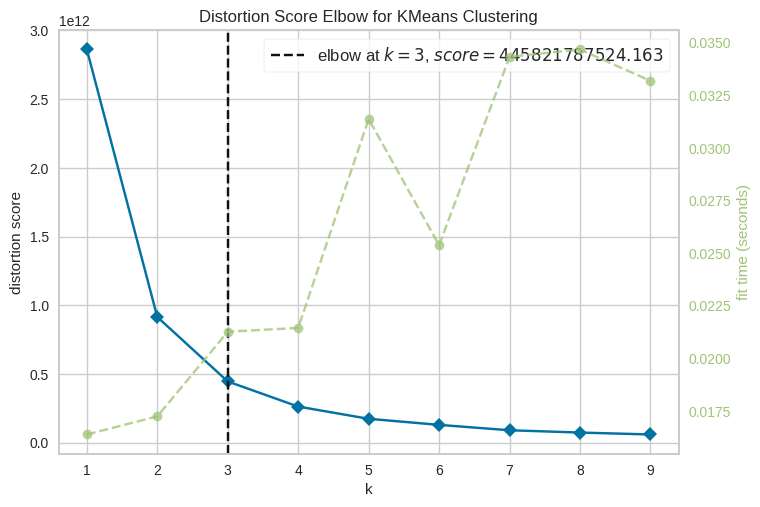

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [133]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)
visualizer.poof()

In [134]:
kmeans = KMeans(n_clusters=3)


In [136]:
kmeans.fit(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [137]:
cluster_labels = kmeans.fit_predict(data)
kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 0.09533096,  0.26125692,  0.03758114,  0.45959558,  0.09590937,
        -0.30721613],
       [ 1.84335427,  1.65800824,  1.59347012,  0.53425394,  1.83940394,
         0.06514716],
       [-0.7529508 , -0.83092448, -0.61162985, -0.59646448, -0.75202257,
         0.24534476]])

In [141]:
silhouette_avg = metrics.silhouette_score(data, cluster_labels)
print ('silhouette coefficient = ', silhouette_avg)

silhouette coefficient =  0.28480007479979635


In [144]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity = purity_score(target, cluster_labels)
print ('purity = ', purity)

purity =  0.8344444444444444


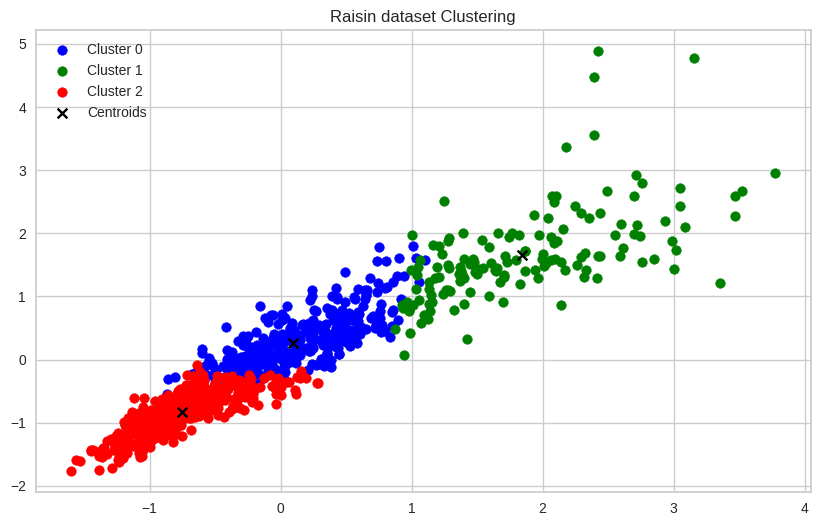

In [148]:
plt.figure(figsize=(10, 6))

colors = ['blue', 'green', 'red']

for cluster_label in range(len(kmeans.cluster_centers_)):
    cluster_data = data[cluster_labels == cluster_label]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], color=colors[cluster_label], label=f'Cluster {cluster_label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')

plt.title('Raisin dataset Clustering')
plt.legend()
plt.show()



## Implementação do KMeans como vista em sala de aula

In [20]:

centers = 5
x_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
x_train = StandardScaler().fit_transform(x_train)


In [14]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs


In [4]:
def distance_between(point, set):
    return np.sqrt(np.sum((point - set)**2, axis=1))


In [5]:
def kmeans_algorithm(n_clusters, x_train, max_iterations = 300):
  # inicializa centroides de maneira aleatória com distribuição uniforme
  centroids = [random.choice(x_train)]
  distances = np.sum([distance_between(centroid, x_train) for centroid in centroids], axis=0)
  distances /= np.sum(distances)
  new_centroid_idx, = np.random.choice(range(len(x_train)), size=1, p=distances)
  centroids += [x_train[new_centroid_idx]]

  # otimiza a localização dos centroides
  iteration = 0
  previous_centroids = None
  while np.not_equal(centroids, previous_centroids).any() and iteration < max_iterations:
    clusters = [[] for j in range(n_clusters)]
    for x in x_train:
      distances = distance_between(x, centroids)
      min_distance_index = np.argmin(distances)
      clusters[min_distance_index].append(x)

    previous_centroids = centroids
    centroids = [np.mean(cluster, axis=0) for cluster in clusters]

    for i, centroid in enumerate(centroids):
      if np.isnan(centroid).any():
        try:
            centroids[i] = previous_centroids[i]
        except:
            centroids = centroids[:-1]
    iteration += 1

  evaluation_centroids = []
  indexes = []

  for x in x_train:
    distances = distance_between(x, centroids)
    min_distance = np.argmin(distances)
    evaluation_centroids.append(centroids[min_distance])
    indexes.append(min_distance)

  return centroids, evaluation_centroids, indexes




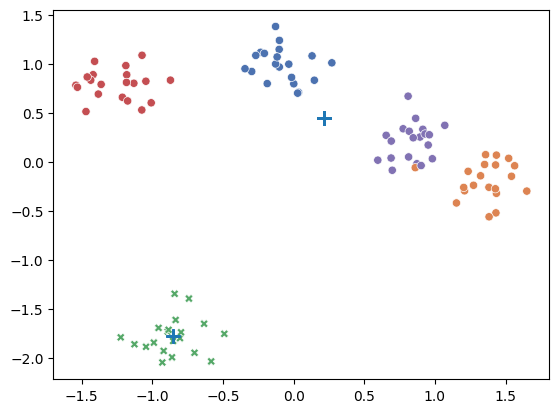

In [21]:
centers, centroids, classification = kmeans_algorithm(2, x_train)

sns.scatterplot(x=[x[0] for x in x_train],
                y=[x[1] for x in x_train],
                style=classification,
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.plot([x for x,_ in centroids],
         [y for _,y in centroids],
         '+',
         markersize=10,
         )
plt.show()

## DBSCAN

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics



In [149]:
raisin = fetch_ucirepo(id=850)

dataset = raisin.data.original

# define features e target
features = dataset.iloc[:, 0:6]
target = dataset.iloc[:, -1]

# normaliza os dados para garantir que todos estejam utilizando a mesma escala, de forma a não desequilibrar os resultados
data = features.values
data = data.astype(float)
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = pd.DataFrame(data)

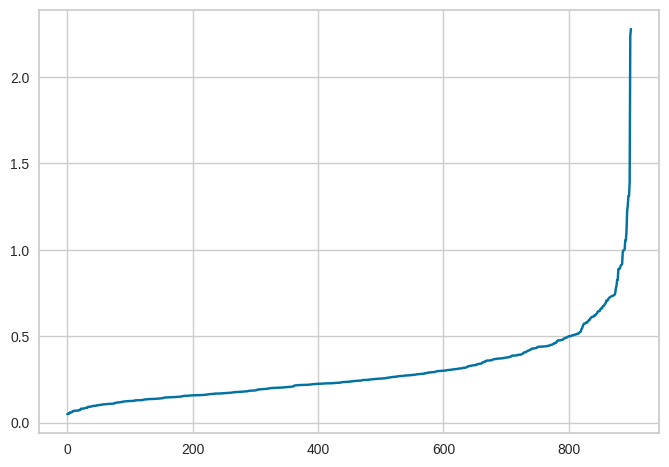

In [153]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


(0.5, 2.0)

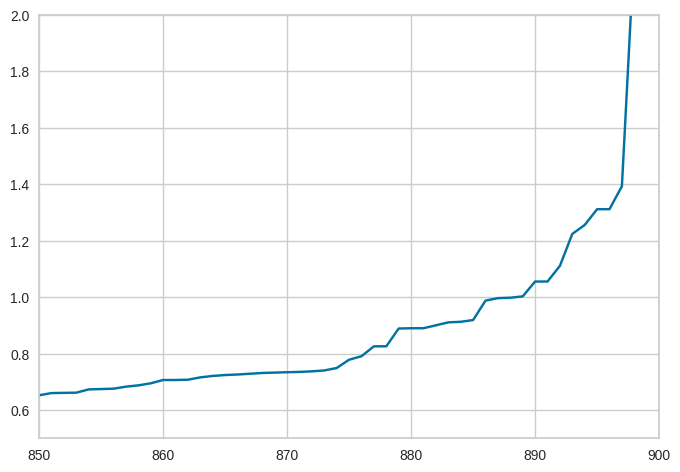

In [160]:
distances = np.sort(distances, axis=0)
plt.plot(distances)
plt.xlim(850, 900)
plt.ylim(0.5, 2)


In [162]:
eps_test = np.arange(1, 1.8, 0.01)

for eps in eps_test:
  model = DBSCAN(eps=eps, min_samples=26)
  model.fit(data)
  labels = model.labels_

  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)

  print("eps: " + str(eps))
  print("Num de clusters: " + str(n_clusters))
  print("Num amostras de ruido: " + str(n_noise))



eps: 1.0
Num de clusters: 1
Num amostras de ruido: 110
eps: 1.01
Num de clusters: 1
Num amostras de ruido: 98
eps: 1.02
Num de clusters: 1
Num amostras de ruido: 97
eps: 1.03
Num de clusters: 1
Num amostras de ruido: 94
eps: 1.04
Num de clusters: 1
Num amostras de ruido: 94
eps: 1.05
Num de clusters: 1
Num amostras de ruido: 90
eps: 1.06
Num de clusters: 1
Num amostras de ruido: 88
eps: 1.07
Num de clusters: 1
Num amostras de ruido: 84
eps: 1.08
Num de clusters: 1
Num amostras de ruido: 80
eps: 1.09
Num de clusters: 1
Num amostras de ruido: 75
eps: 1.1
Num de clusters: 1
Num amostras de ruido: 72
eps: 1.11
Num de clusters: 1
Num amostras de ruido: 69
eps: 1.12
Num de clusters: 1
Num amostras de ruido: 66
eps: 1.1300000000000001
Num de clusters: 1
Num amostras de ruido: 64
eps: 1.1400000000000001
Num de clusters: 1
Num amostras de ruido: 63
eps: 1.1500000000000001
Num de clusters: 1
Num amostras de ruido: 61
eps: 1.1600000000000001
Num de clusters: 1
Num amostras de ruido: 61
eps: 1.170

In [87]:
model = DBSCAN(eps=5900, min_samples=26)
model.fit(features)
labels = model.labels_


In [ ]:
eps_test = np.arange(1, 1.8, 0.01)

for eps in eps_test:
  model = DBSCAN(eps=eps, min_samples=26)
  model.fit(data)
  labels = model.labels_

  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)

  print("eps: " + str(eps))
  print("Num de clusters: " + str(n_clusters))
  print("Num amostras de ruido: " + str(n_noise))



eps: 1.0
Num de clusters: 1
Num amostras de ruido: 110
eps: 1.01
Num de clusters: 1
Num amostras de ruido: 98
eps: 1.02
Num de clusters: 1
Num amostras de ruido: 97
eps: 1.03
Num de clusters: 1
Num amostras de ruido: 94
eps: 1.04
Num de clusters: 1
Num amostras de ruido: 94
eps: 1.05
Num de clusters: 1
Num amostras de ruido: 90
eps: 1.06
Num de clusters: 1
Num amostras de ruido: 88
eps: 1.07
Num de clusters: 1
Num amostras de ruido: 84
eps: 1.08
Num de clusters: 1
Num amostras de ruido: 80
eps: 1.09
Num de clusters: 1
Num amostras de ruido: 75
eps: 1.1
Num de clusters: 1
Num amostras de ruido: 72
eps: 1.11
Num de clusters: 1
Num amostras de ruido: 69
eps: 1.12
Num de clusters: 1
Num amostras de ruido: 66
eps: 1.1300000000000001
Num de clusters: 1
Num amostras de ruido: 64
eps: 1.1400000000000001
Num de clusters: 1
Num amostras de ruido: 63
eps: 1.1500000000000001
Num de clusters: 1
Num amostras de ruido: 61
eps: 1.1600000000000001
Num de clusters: 1
Num amostras de ruido: 61
eps: 1.170

In [91]:
min_samples_test = np.arange(30, 100, 10)
print(min_samples_test)

for m_sample in min_samples_test:
  model = DBSCAN(eps=1.58, min_samples=m_sample)
  model.fit(features)
  labels = model.labels_

  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise = list(labels).count(-1)

  print("min_samples: " + str(m_sample))
  print("Num de clusters: " + str(n_clusters))
  print("Num amostras de ruido: " + str(n_noise))


[30 40 50 60 70 80 90]
min_samples: 30
Num de clusters: 0
Num amostras de ruido: 900
min_samples: 40
Num de clusters: 0
Num amostras de ruido: 900
min_samples: 50
Num de clusters: 0
Num amostras de ruido: 900
min_samples: 60
Num de clusters: 0
Num amostras de ruido: 900
min_samples: 70
Num de clusters: 0
Num amostras de ruido: 900
min_samples: 80
Num de clusters: 0
Num amostras de ruido: 900
min_samples: 90
Num de clusters: 0
Num amostras de ruido: 900


In [101]:
model = DBSCAN(eps=1.58, min_samples=200)
model.fit(features)
labels = model.labels_

In [104]:
features

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent
0,87524,442.246011,253.291155,0.819738,90546,0.758651
1,75166,406.690687,243.032436,0.801805,78789,0.684130
2,90856,442.267048,266.328318,0.798354,93717,0.637613
3,45928,286.540559,208.760042,0.684989,47336,0.699599
4,79408,352.190770,290.827533,0.564011,81463,0.792772
...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793
896,87350,440.735698,259.293149,0.808629,90899,0.636476
897,99657,431.706981,298.837323,0.721684,106264,0.741099
898,93523,476.344094,254.176054,0.845739,97653,0.658798


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


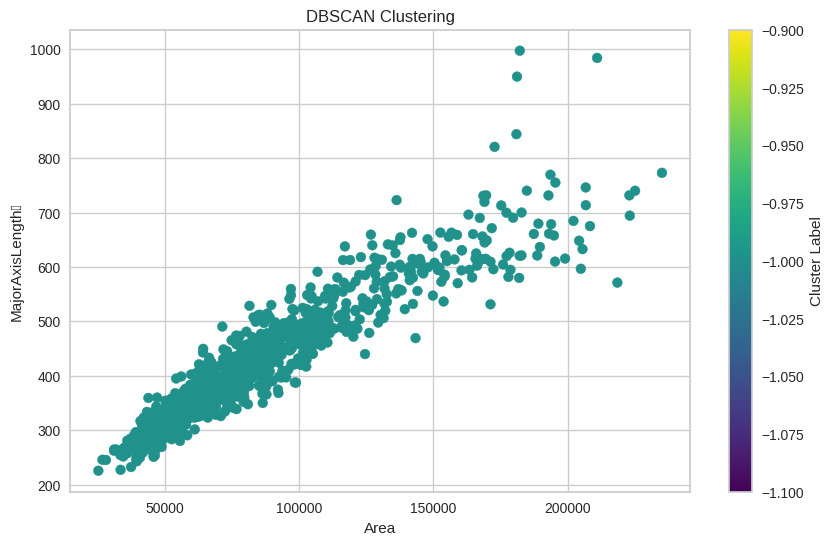

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Area')
plt.ylabel('MajorAxisLength	')
plt.colorbar(label='Cluster Label')
plt.show()


## Fuzzy CMEANS

In [106]:
!pip install -U scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=14948b4a4ae6be108789c03377654fea80443f49811393ac65c1da8fa54e828f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import skfuzzy as fuzz
from sklearn import metrics

In [107]:
raisin = fetch_ucirepo(id=850)

dataset = raisin.data.original

features = dataset.iloc[:, 0:6]
target = dataset.iloc[:, -1]

n_clusters = 3


In [111]:
# Fuzzy c-means
# testando melhor valor para "m"
m_values = np.arange(2, 3.55, 0.05)


for m in m_values:
  cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(features, n_clusters, m, error=0.005, maxiter=1000)
  print(f"com m = {m:.2f}, temos fpc = {fpc:.3f}")

com m = 2.00, temos fpc = 1.000
com m = 2.05, temos fpc = 0.937
com m = 2.10, temos fpc = 0.932
com m = 2.15, temos fpc = 0.927
com m = 2.20, temos fpc = 1.000
com m = 2.25, temos fpc = 1.000
com m = 2.30, temos fpc = 0.913
com m = 2.35, temos fpc = 0.908
com m = 2.40, temos fpc = 1.000
com m = 2.45, temos fpc = 0.899
com m = 2.50, temos fpc = 0.999
com m = 2.55, temos fpc = 0.890
com m = 2.60, temos fpc = 0.885
com m = 2.65, temos fpc = 0.999
com m = 2.70, temos fpc = 0.876
com m = 2.75, temos fpc = 0.998
com m = 2.80, temos fpc = 0.866
com m = 2.85, temos fpc = 0.861
com m = 2.90, temos fpc = 0.856
com m = 2.95, temos fpc = 0.996
com m = 3.00, temos fpc = 0.995
com m = 3.05, temos fpc = 0.841
com m = 3.10, temos fpc = 0.994
com m = 3.15, temos fpc = 0.993
com m = 3.20, temos fpc = 0.992
com m = 3.25, temos fpc = 0.990
com m = 3.30, temos fpc = 0.989
com m = 3.35, temos fpc = 0.988
com m = 3.40, temos fpc = 0.804
com m = 3.45, temos fpc = 0.985
com m = 3.50, temos fpc = 0.983


In [113]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(features, n_clusters, 2, error=0.005, maxiter=1000)


In [122]:
plt.figure(figsize=(10, 6))
cluster_membership = np.argmax(u, axis=0)

colors = ['blue', 'green', 'red']

for cluster_label in range(n_clusters):
    cluster_data = features[cluster_membership == cluster_label]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], color=colors[cluster_label], label=f'Cluster {cluster_label}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')

plt.title('Raisin dataset Clustering')
plt.legend()
plt.show()


KeyError: True

<Figure size 1000x600 with 0 Axes>